In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats
from numpy.linalg import inv
from scipy import stats
import statsmodels.api as sm
import random
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

def import_data():
    df = pd.read_csv('data_dm3.csv', delimiter=",", header=None)
    return df

df = import_data()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


# Question 1

Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expliquer. Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives
et le nombre d’observations.

In [2]:
df.shape[1]

211

In [3]:
num_df_cols = df.shape[1] - 1
dfX = df.drop(num_df_cols, axis=1)
dfX.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.937546,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,0.940726,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,0.338998,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.733290,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,-0.714867,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853


In [4]:
dfY = df[num_df_cols]
dfY.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: 210, dtype: float64

In [6]:
print("Nombre de variable explicatives:", dfX.shape[1])
print("Numbre d'observations", dfX.shape[0])

Nombre de variable explicatives: 210
Numbre d'observations 442


# Question 2

Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ? Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des autres). Commenter les graphiques obtenus.

In [7]:
dfX.mean(axis=0)

0      7.535450e-19
1     -1.507090e-17
2      5.494599e-20
3     -7.284269e-18
4      8.288995e-18
5     -2.712762e-17
6      1.971776e-17
7      8.540177e-18
8      1.029845e-17
9      4.018907e-18
10    -1.444295e-17
11     3.717489e-17
12    -3.642134e-17
13    -1.124038e-17
14    -3.750456e-17
15    -4.511851e-17
16     2.461580e-17
17     9.293722e-18
18     2.662526e-17
19    -5.601351e-17
20    -3.067556e-17
21    -4.521270e-18
22     6.781905e-18
23    -4.056584e-17
24     1.004727e-18
25    -2.813235e-17
26    -3.540092e-17
27    -5.953006e-17
28    -4.533829e-17
29     3.064416e-17
           ...     
180   -3.767725e-18
181    3.843080e-17
182    4.018907e-18
183    6.380015e-17
184    1.795949e-17
185   -1.306145e-17
186    1.550053e-17
187    3.918434e-17
188    1.871304e-17
189    1.356381e-17
190   -2.737880e-17
191    2.210399e-17
192   -3.843080e-17
193    4.511851e-17
194   -6.530724e-18
195   -3.014180e-17
196    3.014180e-17
197   -2.888589e-17
198    7.887105e-17


In [8]:
dfX.var(axis=0)

0      1.002268
1      1.002268
2      1.002268
3      1.002268
4      1.002268
5      1.002268
6      1.002268
7      1.002268
8      1.002268
9      1.002268
10     1.002268
11     1.002268
12     1.002268
13     1.002268
14     1.002268
15     1.002268
16     1.002268
17     1.002268
18     1.002268
19     1.002268
20     1.002268
21     1.002268
22     1.002268
23     1.002268
24     1.002268
25     1.002268
26     1.002268
27     1.002268
28     1.002268
29     1.002268
         ...   
180    1.002268
181    1.002268
182    1.002268
183    1.002268
184    1.002268
185    1.002268
186    1.002268
187    1.002268
188    1.002268
189    1.002268
190    1.002268
191    1.002268
192    1.002268
193    1.002268
194    1.002268
195    1.002268
196    1.002268
197    1.002268
198    1.002268
199    1.002268
200    1.002268
201    1.002268
202    1.002268
203    1.002268
204    1.002268
205    1.002268
206    1.002268
207    1.002268
208    1.002268
209    1.002268
Length: 210, dtype: floa

In [9]:
dfY.mean(axis=0)

152.13348416289594

In [10]:
dfY.var(axis=0)

5943.331347923785

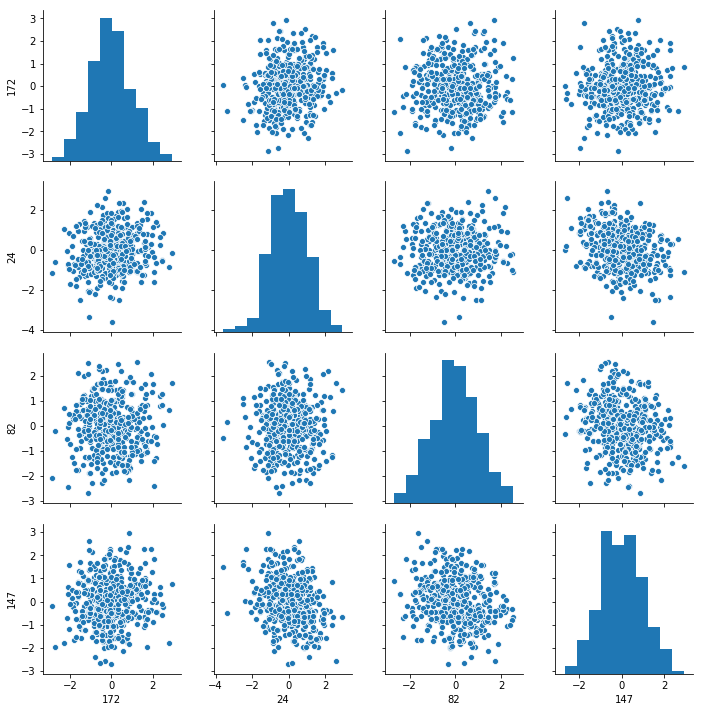

In [12]:
def rand():
    return random.randint(0, dfX.shape[1] - 1)

rand_cols = [rand() for i in range(4)]

sns.pairplot(dfX[rand_cols])

# Question 3

Donner la matrix des correlations. Tracer le graphes de la décroissance des valeurs propres de la matrice de corrélation. Expliquer pourquoi il est légitime de ne garder que les premières variables de l’ACP. On gardera 60 variables dans la suite.

La matrice des correlations est définie de la manière suivante:

$$Cor(X) = (X - \mathbb{E}(X))^T(X - \mathbb{E}(X))$$

Mais nous avons vu dans la question précedente que l'espérence de $X$ est nulle, donc notre matrice des correlations est égale à la matrice de Gram:

$$Cor(X) = X^TX$$

(442, 60)

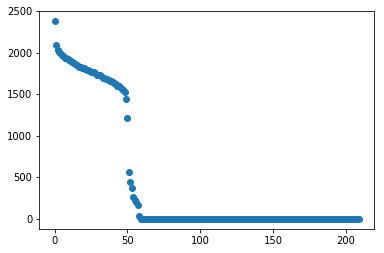

In [204]:
X = np.matrix(dfX)
Y = np.matrix(dfY)
G = X.T@X
u, s, vh = np.linalg.svd(G)
plt.scatter(range(len(s)), s)

X2 = X@u[:,0:60]
X2.shape

# Question 4

Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle, un pour tester le modèle. On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles de chacun des 2 échantillons.

In [205]:
X_test = X2[0:88,:]
X_train = X2[87:-1,:]

Y = np.matrix(dfY).T
Y_test = Y[0:88]
Y_train = Y[87:-1]

print("X test shape:", X_test.shape)
print("X train shape:", X_train.shape)
print("Y test shape:", Y_test.shape)
print("Y train shape:", Y_train.shape)

X test shape: (88, 60)
X train shape: (354, 60)
Y test shape: (88, 1)
Y train shape: (354, 1)


# Question 5

Suivant les observations de la question (Q3), appliquer la méthode de "PCA before OLS" qui consiste à faire une ACP avant la régression. On tracera les valeurs des coefficients de régression calculés (sans l’intercept). Sur un autre graphique, faire de même avec la méthode des moindres carrées classique.

In [206]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

theta_hat_pca_before_ols = LinearRegression(fit_intercept=True).fit(X_pca,Y_train)
theta_hat_pca_before_ols.coef_

array([[ 1.26364895e+01,  3.18108225e+00,  5.26963933e+00,
         8.05633136e+00, -7.90881197e-01, -6.36003104e-01,
        -2.84106765e+00, -5.96359867e-01, -6.49869641e-01,
        -1.12653247e-01,  2.05005317e+00,  3.97927997e+00,
         3.76613502e+00, -2.62445233e+00, -9.10733887e-01,
         2.76357173e-01, -3.02869564e+00,  8.68427753e-01,
         3.24806208e+00, -2.90439251e+00,  1.61888699e+00,
        -1.30124617e+00,  9.96551849e-01,  1.20663568e+00,
         3.71922962e+00,  2.18895085e+00, -2.79072527e-01,
        -4.11746293e+00, -4.85899334e+00, -2.12382203e+00,
        -3.70217064e+00,  3.89457583e+00, -1.62216394e-02,
         2.50868142e-01,  9.28227173e-01, -2.52446966e+00,
         7.16144172e-01,  1.37400778e+00,  1.97283773e+00,
         3.26713777e+00,  4.46212869e+00,  2.39244875e-01,
         1.29044673e+00, -2.10821711e+00,  5.12407575e+00,
         2.82660249e+00,  3.95622150e-01, -4.32020189e+00,
         1.01873425e+01,  1.89246651e+00,  2.64723407e+0

In [207]:
theta_hat_ols = LinearRegression(fit_intercept=True).fit(X_train, Y_train)
theta_hat_ols.coef_

array([[-1.51667749e+01, -1.01182490e+00, -3.45632561e-01,
        -5.15852648e+00,  3.03062233e+00, -3.90311506e+00,
        -3.22055004e+00, -1.52690999e+00, -9.87227874e-04,
        -3.97440996e+00, -5.94668875e-01, -1.82192084e+00,
        -1.38467265e+00,  1.10609902e+00, -8.90434839e-01,
         2.67250398e+00,  1.90418388e+00, -2.98230234e+00,
         3.02719326e+00,  9.81985206e-01,  1.11715367e+00,
        -2.98165364e+00, -2.10125175e-01,  1.09347995e+00,
         1.21441877e+00, -2.48086067e+00, -3.75683271e+00,
         1.65783367e+00, -1.88117865e-01, -1.36417171e-01,
        -2.84190241e+00, -1.90882866e+00, -5.13304075e-01,
         1.17744906e+00, -7.66186897e-01, -3.45132362e+00,
         1.30850227e+00,  6.95863796e-01, -8.80289371e-01,
        -4.54251967e-01,  4.01316077e+00, -2.73617480e+00,
         1.20430927e+00, -8.06324581e-01, -1.44501300e+00,
        -2.53189706e+00,  1.24256613e-01, -2.62578800e+00,
         1.21649820e+00,  5.13308425e+00,  1.25623509e+0

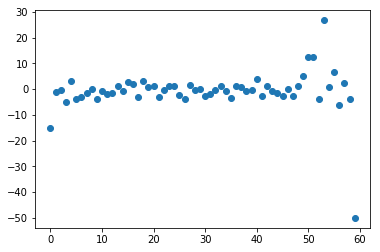

In [208]:
plt.scatter(range(theta_hat_ols.coef_.shape[1]), theta_hat_ols.coef_)

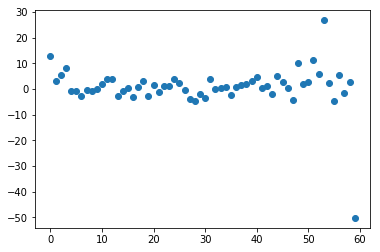

In [209]:
plt.scatter(range(theta_hat_pca_before_ols.coef_.shape[1]), theta_hat_pca_before_ols.coef_)

# Question 6

Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter. Centrer et réduire les variables après ACP (de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y sut le train.